load data 

In [7]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import json
import uunet.multinet as ml
import diptest
from latent_ideology.latent_ideology_class import latent_ideology as li
import networkx as nx
import matplotlib.colors as mcolors
from utils import *

In [8]:
# %%load data 
n_cop = '26'
n_influencers = 100

folder = '/Users/alessiogandelli/data/cop' + str(n_cop) + '/'
projected_path = folder + 'networks/cop' + str(n_cop) +'_retweet_network_ml.gml'
topic_label = json.load(open(folder + 'cache/labels_cop'+str(n_cop)+'.json'))
topic_label = {int(k): v for k, v in topic_label.items()}# key float to int

retweet_df_path = folder + 'cache/retweets_labeled_cop'+str(n_cop)+'.pkl'
tweet_cop26_path = folder + 'cache/tweets_cop'+str(n_cop)+'.pkl'

retweet_df = pd.read_pickle(retweet_df_path)
tweet_cop26 = pd.read_pickle(tweet_cop26_path)

mln = ml.read(projected_path)   # multilayer network

layers = ml.to_nx_dict(mln) # dictionary where we have a networkx graph for each layer
layers = {int(float(k)): v for k, v in layers.items()} # key float to int


rt_net_path = folder + 'networks/cop'+str(n_cop)+'_retweet_network.gml' 
rt_net = nx.read_gml(rt_net_path)

In [ ]:
res = get_polarization_by_layer(layers, n_influencers = 100, n = 2)
sorted_topic_label= plot_dip_test(res, layers, topic_label=topic_label)

In [38]:
def create_plots(topics, title,only_influencers=False, topic_label=None, layers=None, res=None):
    fig, axs = plt.subplots(len(topics), figsize=(6, 8))
    # add title 
    fig.suptitle(title, fontsize=24)

    for i, topic in enumerate(topics):
        ax = axs[i]
        ax.set_title('Topic: ' + str(topic) + ' - ' + topic_label[topic])
        draw_network(topic, ax, layers, res ,only_influencers=only_influencers)
    plt.tight_layout()

    # remove space and punctiation from title

    #save publication quality images in pdf 
    fig.savefig(title +'.pdf',format= 'pdf' ,bbox_inches='tight', dpi=800)
    return fig, axs

(<Figure size 600x800 with 5 Axes>,
 array([<Axes: title={'center': "Topic: 3 - Scotland's Climate Change Achievements"}>,
        <Axes: title={'center': 'Topic: 11 - Climate Change and Boris Johnson'}>,
        <Axes: title={'center': 'Topic: 0 - Climate Change Impact in Mozambique'}>,
        <Axes: title={'center': 'Topic: 2 - Carbon Pricing & Emissions Reduction'}>,
        <Axes: title={'center': 'Topic: 10 - Temperature Rise and Global Warming'}>],
       dtype=object))

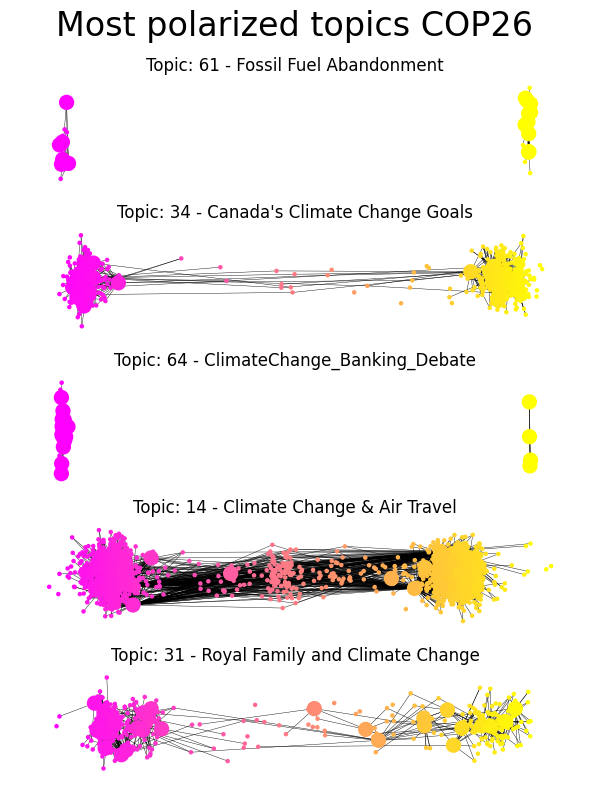

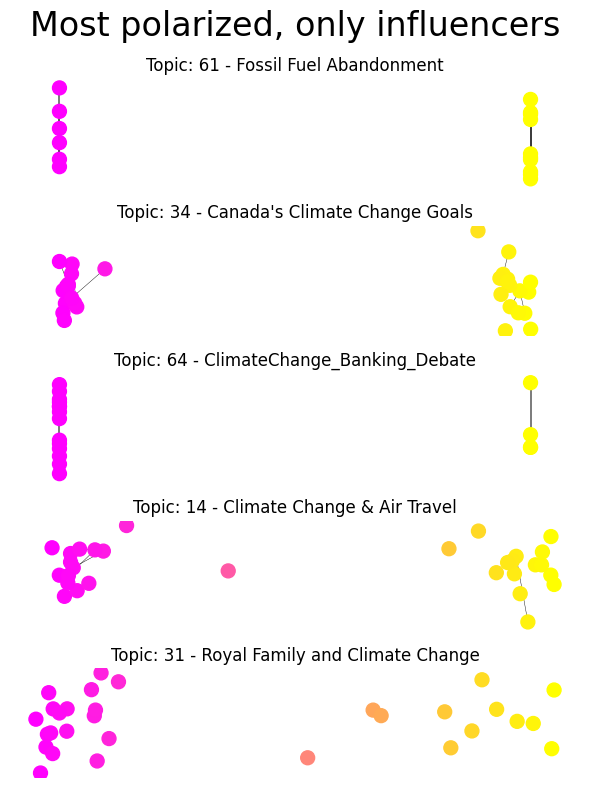

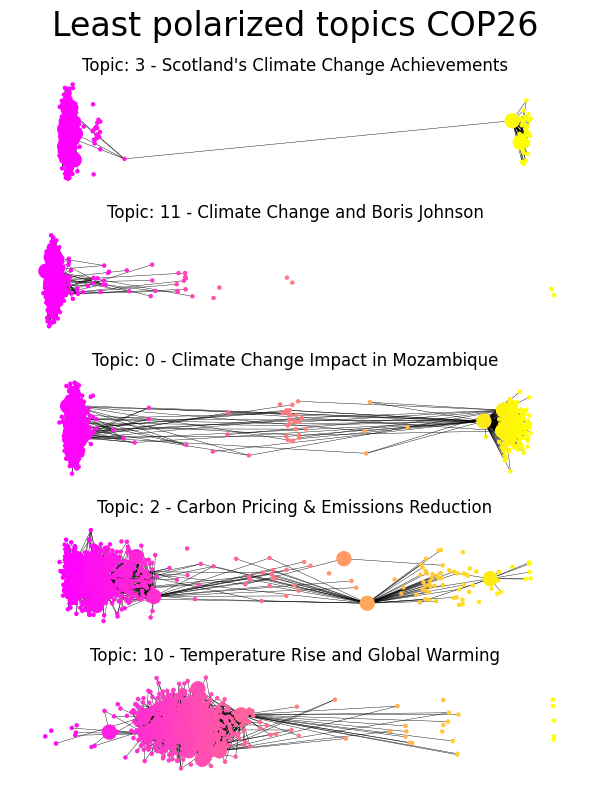

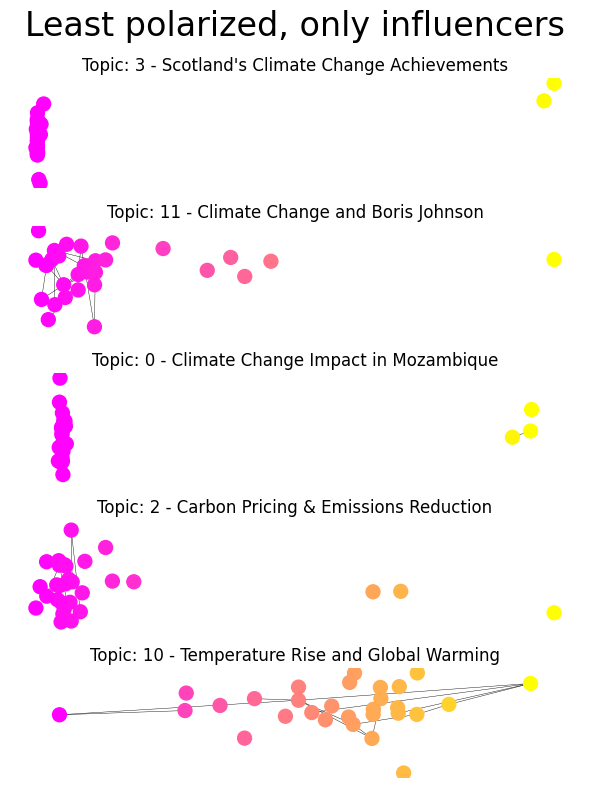

In [39]:
# %%
topics_pol = [t[0] for t in sorted_topic_label[:5]]
topics_not_pol = [t[0] for t in sorted_topic_label[-5:]]
topics_not_pol.reverse()

# 4 subplots



create_plots(topics_pol, 'Most polarized topics COP26', topic_label=topic_label, layers=layers, res=res)
create_plots(topics_pol,'Most polarized, only influencers',only_influencers=True, topic_label=topic_label, layers=layers, res=res)
create_plots(topics_not_pol, 'Least polarized topics COP26', topic_label=topic_label, layers=layers, res=res)
create_plots(topics_not_pol,'Least polarized, only influencers', only_influencers=True, topic_label=topic_label, layers=layers, res=res)



/var/folders/3d/gwpjk7bs72x11tjz__t3mmqr0000gn/T/ipykernel_62686/1748634073.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  topics_df['day'] = pd.to_datetime(topics_df['date']).dt.date


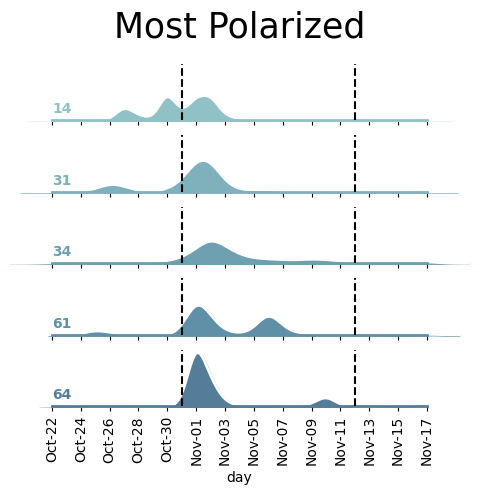

In [34]:
ridge_plot(retweet_df, topics_pol, 'Most')

/var/folders/3d/gwpjk7bs72x11tjz__t3mmqr0000gn/T/ipykernel_62686/1748634073.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  topics_df['day'] = pd.to_datetime(topics_df['date']).dt.date


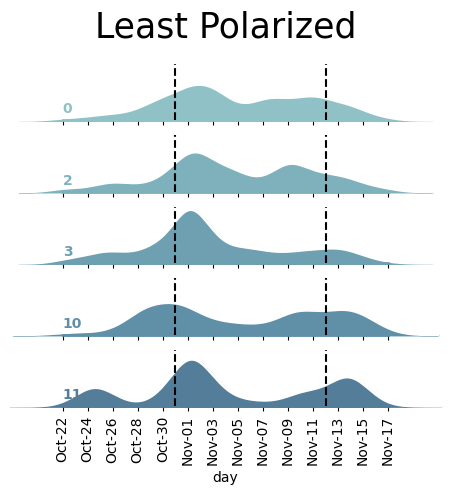

In [35]:
ridge_plot(retweet_df, topics_not_pol, 'Least')